<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/epacuit/introduction-machine-learning/blob/main/classification/example-multiclass-classification.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(multiclass-classification)=
# Example: Multiclass Classification Problem

This example is taken from Section 4.2 of the book "Deep Learning with Python" by François Chollet.

The Reuters dataset is a set of short newswires and their topics, published by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. 

## Step 1: Load the data

In [1]:
from tensorflow.keras.datasets import reuters 

(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

`train_data` and `test_data`: lists of news stories, each story being a list of word indices (encoding a sequence of words).

`train_labels` and `test_labels`: The label associated with an example is an integer between 0 and 45—a topic index.

In [2]:
story_idx = 100
print(train_data[story_idx])
print(train_labels[story_idx])

[1, 367, 1394, 169, 65, 87, 209, 30, 306, 228, 10, 803, 305, 96, 5, 196, 15, 10, 523, 2, 3006, 293, 484, 2, 1440, 5825, 8, 145, 7, 10, 1670, 6, 10, 294, 517, 237, 2, 367, 8042, 7, 2477, 1177, 483, 1440, 5825, 8, 367, 1394, 4, 169, 387, 66, 209, 30, 2344, 652, 1496, 9, 209, 30, 2564, 228, 10, 803, 305, 96, 5, 196, 15, 51, 36, 1457, 24, 1345, 5, 4, 196, 150, 10, 523, 320, 64, 992, 6373, 13, 367, 190, 297, 64, 85, 1692, 6, 8656, 122, 9, 36, 1457, 24, 269, 4753, 27, 367, 212, 114, 45, 30, 3292, 7, 126, 2203, 13, 367, 6, 1818, 4, 169, 65, 96, 28, 432, 23, 189, 1254, 4, 9725, 320, 5, 196, 15, 10, 523, 25, 730, 190, 57, 64, 6, 9953, 2016, 6373, 7, 2, 122, 1440, 5825, 8, 269, 4753, 1217, 7, 608, 2203, 30, 3292, 1440, 5825, 8, 43, 339, 43, 231, 9, 667, 1820, 126, 212, 4197, 21, 1709, 249, 311, 13, 260, 489, 9, 65, 4753, 64, 1209, 4397, 249, 954, 36, 152, 1440, 5825, 506, 24, 135, 367, 311, 34, 420, 4, 8407, 200, 1519, 13, 137, 730, 190, 7, 104, 570, 52, 64, 2492, 7725, 4, 642, 5, 405, 7725, 249

The `reuters` object has a method `get_word_index` that returns a dictionary mapping words to an integer index.

In [3]:
news_idx = 0

word_index = reuters.get_word_index() 

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[news_idx]])

print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [4]:
# the words indices range from 1 to 9999
print(min(min(seq) for seq in train_data))
print(max(max(seq) for seq in train_data))

print(reverse_word_index[1])
print(word_index["the"])


1
9999
the
1


## Step 2: Preprocess the data

In this step, we will convert the lists of integers into tensors that our neural network can process. 

We will implement **multi-hot-encoding** - a binary representation commonly used in NLP - to transform our lists into vectors of 0s and 1s. Each resulting tensor will be a 10,000-element vector where:

* 1 indicates the word appears in the review
* 0 indicates the word is absent

This representation creates a standardized format that our model can efficiently process while preserving the essential information about word presence in each review.



In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        for j in sequence:  
            results[i, j] = 1.
    return results 

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)



In [6]:

# check that the vectorized data is correct
for i in train_data[0]: 
    if x_train[0, i] != 1.0: 
        print(f"i={i} x_train[0, {i}]={x_train[0, i]}")

# test your understanding: why are these values not the same? 
print(sum(x_train[0]))
print(len(train_data[0]))


57.0
87


In [7]:
print(train_labels)

[ 3  4  3 ... 25  3 25]


In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels): 
        results[i, label] = 1.
        
    return results 
    
y_train = to_one_hot(train_labels) 
y_test = to_one_hot(test_labels)

In [9]:
print(y_train[100])

print(train_labels[100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
20


In [10]:
# Note that there is a built-in way to do this in Keras:

from tensorflow.keras.utils import to_categorical 

y_train = to_categorical(train_labels) 
y_test = to_categorical(test_labels)

In [11]:
print(y_train[100])

print(train_labels[100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
20


## Step 3: Build the model

### Softmax

Given a vector of raw predictions (logits) $z = (z_1, z_2, \dots, z_n)$, the softmax function $\sigma(z)$ is defined as:

$$
\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

where:

* $\sigma(z)_i$ is the predicted probability for the $i^{\text{th}}$ class.
* The probabilities satisfy $\sum_{i=1}^{n} \sigma(z)_i = 1$.


In [12]:
import numpy as np

def softmax(z):
    exp_z = np.exp(z)   
    return exp_z / np.sum(exp_z)

# Example usage:
logits = np.array([-20.0, -1.0, -1.1])
probabilities = softmax(logits)
print(probabilities)   
print(np.sum(probabilities))  # the sum of the probabilities should be 1

[2.94135151e-09 5.24979186e-01 4.75020811e-01]
1.0


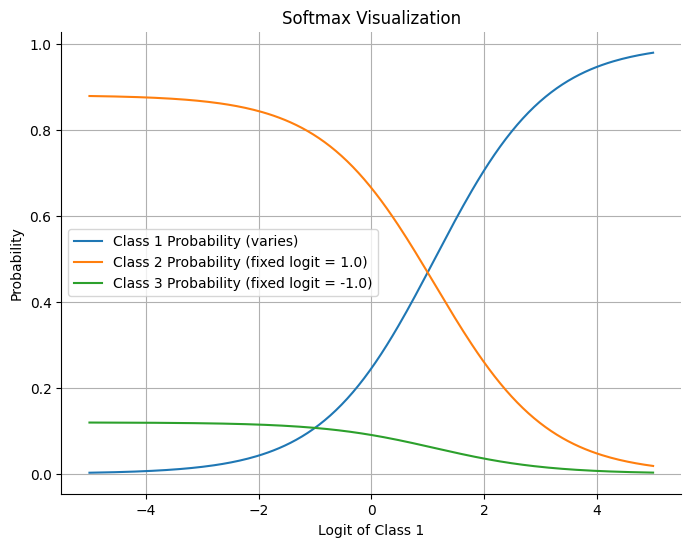

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Varying the logit of class 1, fix logits for class 2 and class 3 at distinct values
logits_class1 = np.linspace(-5, 5, 200)
fixed_logit_class2 = 1.0  
fixed_logit_class3 = -1.0 

probabilities = np.array([
    softmax([z, fixed_logit_class2, fixed_logit_class3]) 
    for z in logits_class1
])

plt.figure(figsize=(8, 6))
plt.plot(logits_class1, probabilities[:, 0], label='Class 1 Probability (varies)')
plt.plot(logits_class1, probabilities[:, 1], label=f'Class 2 Probability (fixed logit = {fixed_logit_class2})')
plt.plot(logits_class1, probabilities[:, 2], label=f'Class 3 Probability (fixed logit = {fixed_logit_class3})')

plt.xlabel("Logit of Class 1")
plt.ylabel("Probability")
plt.title("Softmax Visualization")
plt.grid(True)
sns.despine()
plt.legend()
plt.show()


### Categorical Crossentropy

Categorical cross-entropy is a loss function commonly used to train neural networks for multi-class classification problems, where each instance belongs to exactly one category.

Intuition: It measures how far away your model's predicted probabilities are from the true labels. A smaller loss means your model's predictions are close to the true labels, while a larger loss means predictions are far away.

Given:

* True labels: $y = (y_1, y_2, \dots, y_n)$, represented as a one-hot vector, where exactly one element is $1$ (the true class), and all others are $0$.
* Predicted probabilities: $\hat{y} = (\hat{y}_1, \hat{y}_2, \dots, \hat{y}_n)$, output by the softmax function.
 
The categorical cross-entropy loss is:

$$
\text{Loss} = -\sum_{i=1}^{n} y_i \log(\hat{y}_i)
$$

Since only the true class label $y_i = 1$ contributes, this simplifies to:

$$
\text{Loss} = -\log(\hat{y}_{\text{true class}})
$$


In [14]:
import numpy as np

def categorical_crossentropy(y_true, y_pred):
    # Ensure numerical stability by adding a tiny epsilon
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred))

# Example usage:
y_true = np.array([0, 0.5, 0.5])   
y_pred = np.array([0.0, 1.0, 0.0])  
loss = categorical_crossentropy(y_true, y_pred)
print(loss)   


17.269388197455342


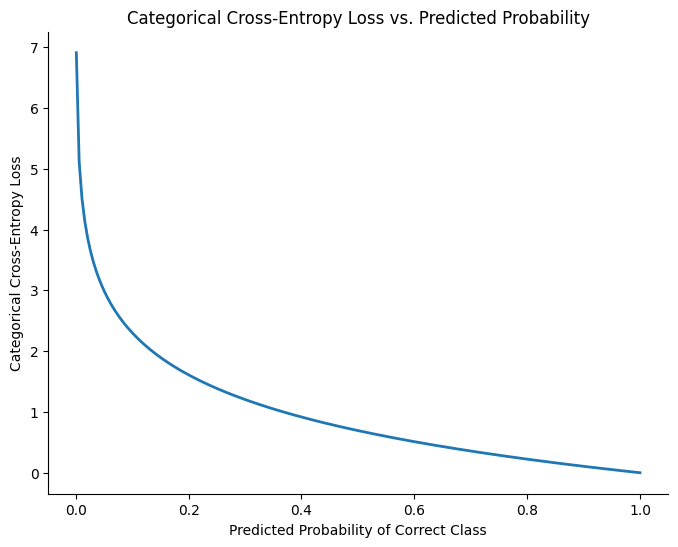

In [15]:

prob_correct = np.linspace(0.001, 1.0, 200)

loss_values = []
for p in prob_correct:
    y_true = np.array([1, 0, 0])            # True class is class 1
    y_pred = np.array([p, (1 - p)/2, (1 - p)/2])  # Remaining probability split evenly
    loss = categorical_crossentropy(y_true, y_pred)
    loss_values.append(loss)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(prob_correct, loss_values, label='Cross-Entropy Loss', linewidth=2)

plt.xlabel('Predicted Probability of Correct Class')
plt.ylabel('Categorical Cross-Entropy Loss')
plt.title('Categorical Cross-Entropy Loss vs. Predicted Probability')
plt.grid(False)
sns.despine()
plt.show()


### Defining the Model

In [16]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense

model = keras.Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Step 4: Train the model


In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

We will train the model for 20 epochs in mini-batches of 512 samples.

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 5s 381ms/step - accuracy: 0.0039 - loss: 3.8228

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2874 - loss: 3.4719  

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3668 - loss: 3.2004

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3742 - loss: 3.1703 - val_accuracy: 0.6330 - val_loss: 1.7893


Epoch 2/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6973 - loss: 1.6369

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6815 - loss: 1.6007 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6843 - loss: 1.5591

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6845 - loss: 1.5550 - val_accuracy: 0.7020 - val_loss: 1.3585


Epoch 3/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7383 - loss: 1.2321

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7456 - loss: 1.2013 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7463 - loss: 1.1825 - val_accuracy: 0.7380 - val_loss: 1.1802


Epoch 4/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7637 - loss: 1.0125

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7900 - loss: 0.9421 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7931 - loss: 0.9389 - val_accuracy: 0.7540 - val_loss: 1.0986


Epoch 5/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8320 - loss: 0.8021

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8347 - loss: 0.7809 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8329 - loss: 0.7795 - val_accuracy: 0.7810 - val_loss: 1.0063


Epoch 6/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8613 - loss: 0.6464

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8632 - loss: 0.6523 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8624 - loss: 0.6514 - val_accuracy: 0.7950 - val_loss: 0.9698


Epoch 7/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8965 - loss: 0.5887

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8868 - loss: 0.5568 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8859 - loss: 0.5504 - val_accuracy: 0.8140 - val_loss: 0.9274


Epoch 8/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8926 - loss: 0.4773

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9013 - loss: 0.4689 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9030 - loss: 0.4613 - val_accuracy: 0.8050 - val_loss: 0.9230


Epoch 9/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9043 - loss: 0.4046

 8/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9138 - loss: 0.3826 

15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9159 - loss: 0.3828

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9162 - loss: 0.3829 - val_accuracy: 0.8190 - val_loss: 0.8839


Epoch 10/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9434 - loss: 0.3068

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9372 - loss: 0.3219 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9349 - loss: 0.3248 - val_accuracy: 0.8220 - val_loss: 0.8876


Epoch 11/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9551 - loss: 0.2749

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9483 - loss: 0.2711 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9453 - loss: 0.2744 - val_accuracy: 0.8120 - val_loss: 0.9187


Epoch 12/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9570 - loss: 0.2351

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9505 - loss: 0.2411 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9475 - loss: 0.2456 - val_accuracy: 0.8250 - val_loss: 0.8710


Epoch 13/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9707 - loss: 0.1958

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9570 - loss: 0.2046 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9534 - loss: 0.2095 - val_accuracy: 0.8240 - val_loss: 0.8916


Epoch 14/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9512 - loss: 0.2069

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9553 - loss: 0.1888 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9541 - loss: 0.1911 - val_accuracy: 0.8210 - val_loss: 0.9024


Epoch 15/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9570 - loss: 0.1688

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9601 - loss: 0.1684 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9573 - loss: 0.1748 - val_accuracy: 0.8220 - val_loss: 0.9031


Epoch 16/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9512 - loss: 0.1645

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9552 - loss: 0.1615 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9545 - loss: 0.1647 - val_accuracy: 0.8100 - val_loss: 0.9275


Epoch 17/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9648 - loss: 0.1155

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9624 - loss: 0.1342

12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9611 - loss: 0.1371

15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9596 - loss: 0.1405

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9589 - loss: 0.1424 - val_accuracy: 0.8090 - val_loss: 0.9745


Epoch 18/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9707 - loss: 0.1083

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9604 - loss: 0.1358 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9585 - loss: 0.1403 - val_accuracy: 0.8070 - val_loss: 1.0075


Epoch 19/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9688 - loss: 0.1335

 8/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9632 - loss: 0.1296 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9606 - loss: 0.1344

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9603 - loss: 0.1349 - val_accuracy: 0.8120 - val_loss: 0.9537


Epoch 20/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.9785 - loss: 0.0751

 3/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9741 - loss: 0.0865 

 6/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9718 - loss: 0.0927

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9684 - loss: 0.1030

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9649 - loss: 0.1137 - val_accuracy: 0.8150 - val_loss: 0.9487


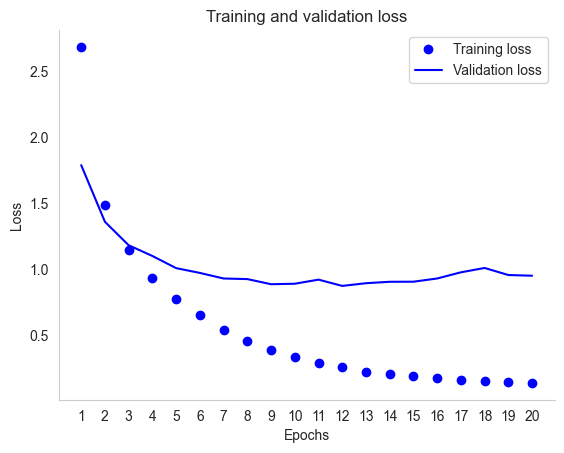

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("whitegrid")
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, "bo", label="Training loss") 
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

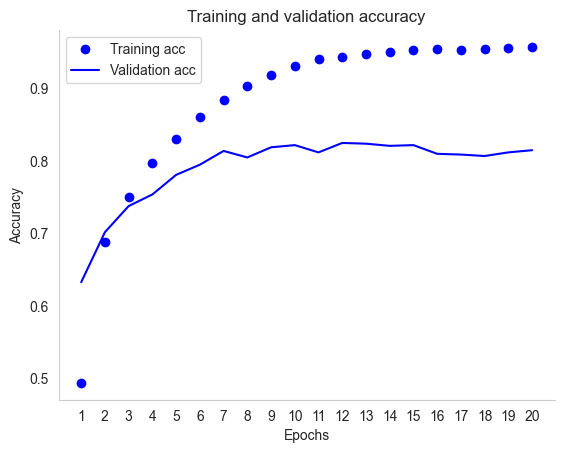

In [20]:
acc = history_dict["accuracy"]

val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Accuracy") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

In [21]:
model = keras.Sequential([
    Dense(64, activation="relu"), 
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512) 
results = model.evaluate(x_test, y_test)

print(f"The test loss is {results[0]}")
print(f"The test accuracy is {results[1]}")


Epoch 1/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 4s 283ms/step - accuracy: 0.0176 - loss: 3.8289

 9/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3109 - loss: 3.5158  

17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3893 - loss: 3.2146

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4022 - loss: 3.1555


Epoch 2/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6641 - loss: 1.5954

 9/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6794 - loss: 1.5650 

17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6819 - loss: 1.5393

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6830 - loss: 1.5318


Epoch 3/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7285 - loss: 1.2134

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7430 - loss: 1.1986 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7505 - loss: 1.1735


Epoch 4/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8145 - loss: 0.9425

 7/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8050 - loss: 0.9560 

13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8039 - loss: 0.9492

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8038 - loss: 0.9414


Epoch 5/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8438 - loss: 0.7700

 8/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8307 - loss: 0.7853 

15/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8320 - loss: 0.7782

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8327 - loss: 0.7754


Epoch 6/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8574 - loss: 0.6299

 8/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8633 - loss: 0.6511 

14/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8658 - loss: 0.6402

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8657 - loss: 0.6384


Epoch 7/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8672 - loss: 0.5923

 7/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8814 - loss: 0.5487

13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8837 - loss: 0.5447

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8854 - loss: 0.5405


Epoch 8/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8945 - loss: 0.4806

 7/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8991 - loss: 0.4682 

13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9011 - loss: 0.4648

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9027 - loss: 0.4600


Epoch 9/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9355 - loss: 0.3270

 7/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9272 - loss: 0.3661

12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9261 - loss: 0.3678

17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9250 - loss: 0.3702

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9246 - loss: 0.3710


 1/71 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.8438 - loss: 0.7325

56/71 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.7981 - loss: 0.9174

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7971 - loss: 0.9185  


The test loss is 0.9321392178535461
The test accuracy is 0.7916295528411865


### Prediction  

In [22]:
predictions = model.predict(x_test[0:5])

story_idx = 4
# Each entry in “predictions” is a vector of length 46:
print(predictions[story_idx].shape)

print(predictions[story_idx])
# The coefficients in this vector sum to 1, as they form a probability distribution:
print(np.sum(predictions[story_idx]))

# The largest entry is the predicted class—the class with the highest probability:
print(np.argmax(predictions[story_idx]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


(46,)
[1.33750006e-03 1.46476377e-04 6.70859881e-04 1.69855470e-04
 5.64657792e-04 5.43543429e-05 3.27649713e-03 7.36068178e-04
 1.38163974e-04 4.38668758e-05 1.34711227e-04 5.83102519e-04
 9.09934097e-05 9.54665661e-01 1.02687183e-04 3.85467501e-05
 2.28786338e-02 7.56242254e-04 2.71285942e-04 1.64165022e-03
 9.62542254e-05 2.62831654e-05 2.50252779e-04 2.01977644e-04
 3.35507357e-05 4.37700329e-03 7.92231658e-05 6.30655210e-04
 2.72845791e-04 1.29617139e-04 1.17634685e-04 9.58873788e-05
 5.89541705e-05 2.04430820e-04 3.11179645e-03 8.98372164e-05
 2.57613847e-05 4.65868681e-04 3.06693473e-05 1.17220552e-04
 8.71372613e-05 9.91829671e-04 9.16228091e-05 4.45815640e-05
 2.18726418e-05 4.54308647e-05]
1.0000001
13


Some things to try: 

* Check the accuracy of a purely random classifier
* Try using different optimizers: `adam` or `sgd`
* Try using larger or smaller layers: 32 units, 128 units, and so on.
* True using a single intermediate layer, or three intermediate layers.



In [23]:
model = keras.Sequential([
    Dense(4, activation="relu"), 
    Dense(4, activation="relu"), 
    Dense(4, activation="relu"), 
    Dense(4, activation="relu"), 
    Dense(46, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512) 
results = model.evaluate(x_test, y_test)

print(f"The test loss is {results[0]}")
print(f"The test accuracy is {results[1]}")
print("The predictions are:")   
print(model.predict(x_test))

Epoch 1/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 7s 463ms/step - accuracy: 0.0078 - loss: 3.8294

16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0805 - loss: 3.8167  

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0872 - loss: 3.8143


Epoch 2/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3457 - loss: 3.7654

17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3286 - loss: 3.7446 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3264 - loss: 3.7427


Epoch 3/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3477 - loss: 3.6784

16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2624 - loss: 3.6605 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2555 - loss: 3.6564


Epoch 4/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3281 - loss: 3.5582

16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2796 - loss: 3.5482 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2717 - loss: 3.5445


Epoch 5/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0527 - loss: 3.4477

16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0641 - loss: 3.4365 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0641 - loss: 3.4325


Epoch 6/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0625 - loss: 3.2897

16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0618 - loss: 3.3258 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0621 - loss: 3.3226


Epoch 7/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0742 - loss: 3.2114

16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0654 - loss: 3.2196 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0653 - loss: 3.2159


Epoch 8/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0684 - loss: 3.1334

14/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0666 - loss: 3.1098 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0665 - loss: 3.1019


Epoch 9/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0898 - loss: 3.0008

17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1128 - loss: 2.9649 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1177 - loss: 2.9627


 1/71 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.1250 - loss: 3.3129

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.2116 - loss: 2.9603


The test loss is 2.980492115020752
The test accuracy is 0.21104185283184052
The predictions are:


 1/71 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step


[[0.00813147 0.03379986 0.02702927 ... 0.00497373 0.00446064 0.00820052]
 [0.01476297 0.03498284 0.024259   ... 0.00947645 0.01566256 0.01722631]
 [0.02005305 0.0307328  0.02164823 ... 0.01769516 0.02082224 0.02100351]
 ...
 [0.01846546 0.03240213 0.0239257  ... 0.01654004 0.01557371 0.01826417]
 [0.00519736 0.0303338  0.02482184 ... 0.00269152 0.00247871 0.00535791]
 [0.0082585  0.03421957 0.02652803 ... 0.00473904 0.00512318 0.00878487]]
